In [ ]:
SAVE_DIR = 'yolov4_people'
DRIVE_DIR = '/content/drive/My Drive'
DRIVE_SAVE_DIR = DRIVE_DIR + '/' + SAVE_DIR
INPUT_SHAPE = '416x416'

In [ ]:
from pathlib import Path
assert Path(DRIVE_DIR).is_dir(), 'Google Drive has not been mounted?'

In [ ]:
!nvidia-smi

Tue Sep  8 12:59:39 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
%cd /content
if not Path('yolov4_people').is_dir():
    !git clone https://github.com/jkjung-avt/yolov4_crowdhuman.git

In [ ]:
%cd /content/yolov4_people/data
!./prepare_data.sh {INPUT_SHAPE}

In [ ]:
%cd /content/yolov4_people
!rm -rf darknet
!git clone https://github.com/AlexeyAB/darknet.git

In [ ]:
%cd /content/yolov4_people/darknet
!sed -i "1s/GPU=0/GPU=1/"               Makefile
!sed -i "2s/CUDNN=0/CUDNN=1/"           Makefile
!sed -i "3s/CUDNN_HALF=0/CUDNN_HALF=1/" Makefile
!sed -i "4s/OPENCV=0/OPENCV=1/"         Makefile
!sed -i "5s/AVX=0/AVX=1/"               Makefile
!sed -i "7s/LIBSO=0/LIBSO=1/"           Makefile

In [ ]:
!sed -i "20s/compute_30,code=sm_30 \\\/compute_37,code=sm_37 -gencode arch=compute_60,code=[sm_60,compute_60] -gencode arch=compute_61,code=[sm_61,compute_61] -gencode arch=compute_75,code=[sm_75,compute_75]/" Makefile
!sed -i "21s/^/#/"                      Makefile
!sed -i "22s/^/#/"                      Makefile
!sed -i "23s/^/#/"                      Makefile
!sed -i "24s/^/#/"                      Makefile

In [ ]:
# To let darknet test mAP more frequently during training 
!sed -i "300s/calc_map_for_each = 4/calc_map_for_each = 1/" src/detector.c
!make

In [ ]:
!mkdir -p "{DRIVE_SAVE_DIR}"
!rm -f "{DRIVE_SAVE_DIR}"/train.log
!touch "{DRIVE_SAVE_DIR}"/chart.png
!rm -f chart.png
!ln -sf "{DRIVE_SAVE_DIR}"/chart.png .
!mkdir -p "{DRIVE_SAVE_DIR}"/backup
!rm -rf backup
!ln -sf "{DRIVE_SAVE_DIR}"/backup .

In [ ]:
%cd /content/yolov4_people
!./prepare_training.sh {INPUT_SHAPE}

In [ ]:
%cd /content/yolov4_people/darknet
!./darknet detector train data/people-{INPUT_SHAPE}.data cfg/yolov4-people-{INPUT_SHAPE}.cfg yolov4.conv.137 -gpus 0 -map -dont_show 2>&1 | tee "{DRIVE_SAVE_DIR}"/train.log 

In [ ]:
!./darknet detector test data/people-{INPUT_SHAPE}.data cfg/yolov4-people-{INPUT_SHAPE}.cfg backup/yolov4-people-{INPUT_SHAPE}_best.weights data/people-{INPUT_SHAPE}/273275,4e9d1000623d182f.jpg -gpus 0 -dont_show

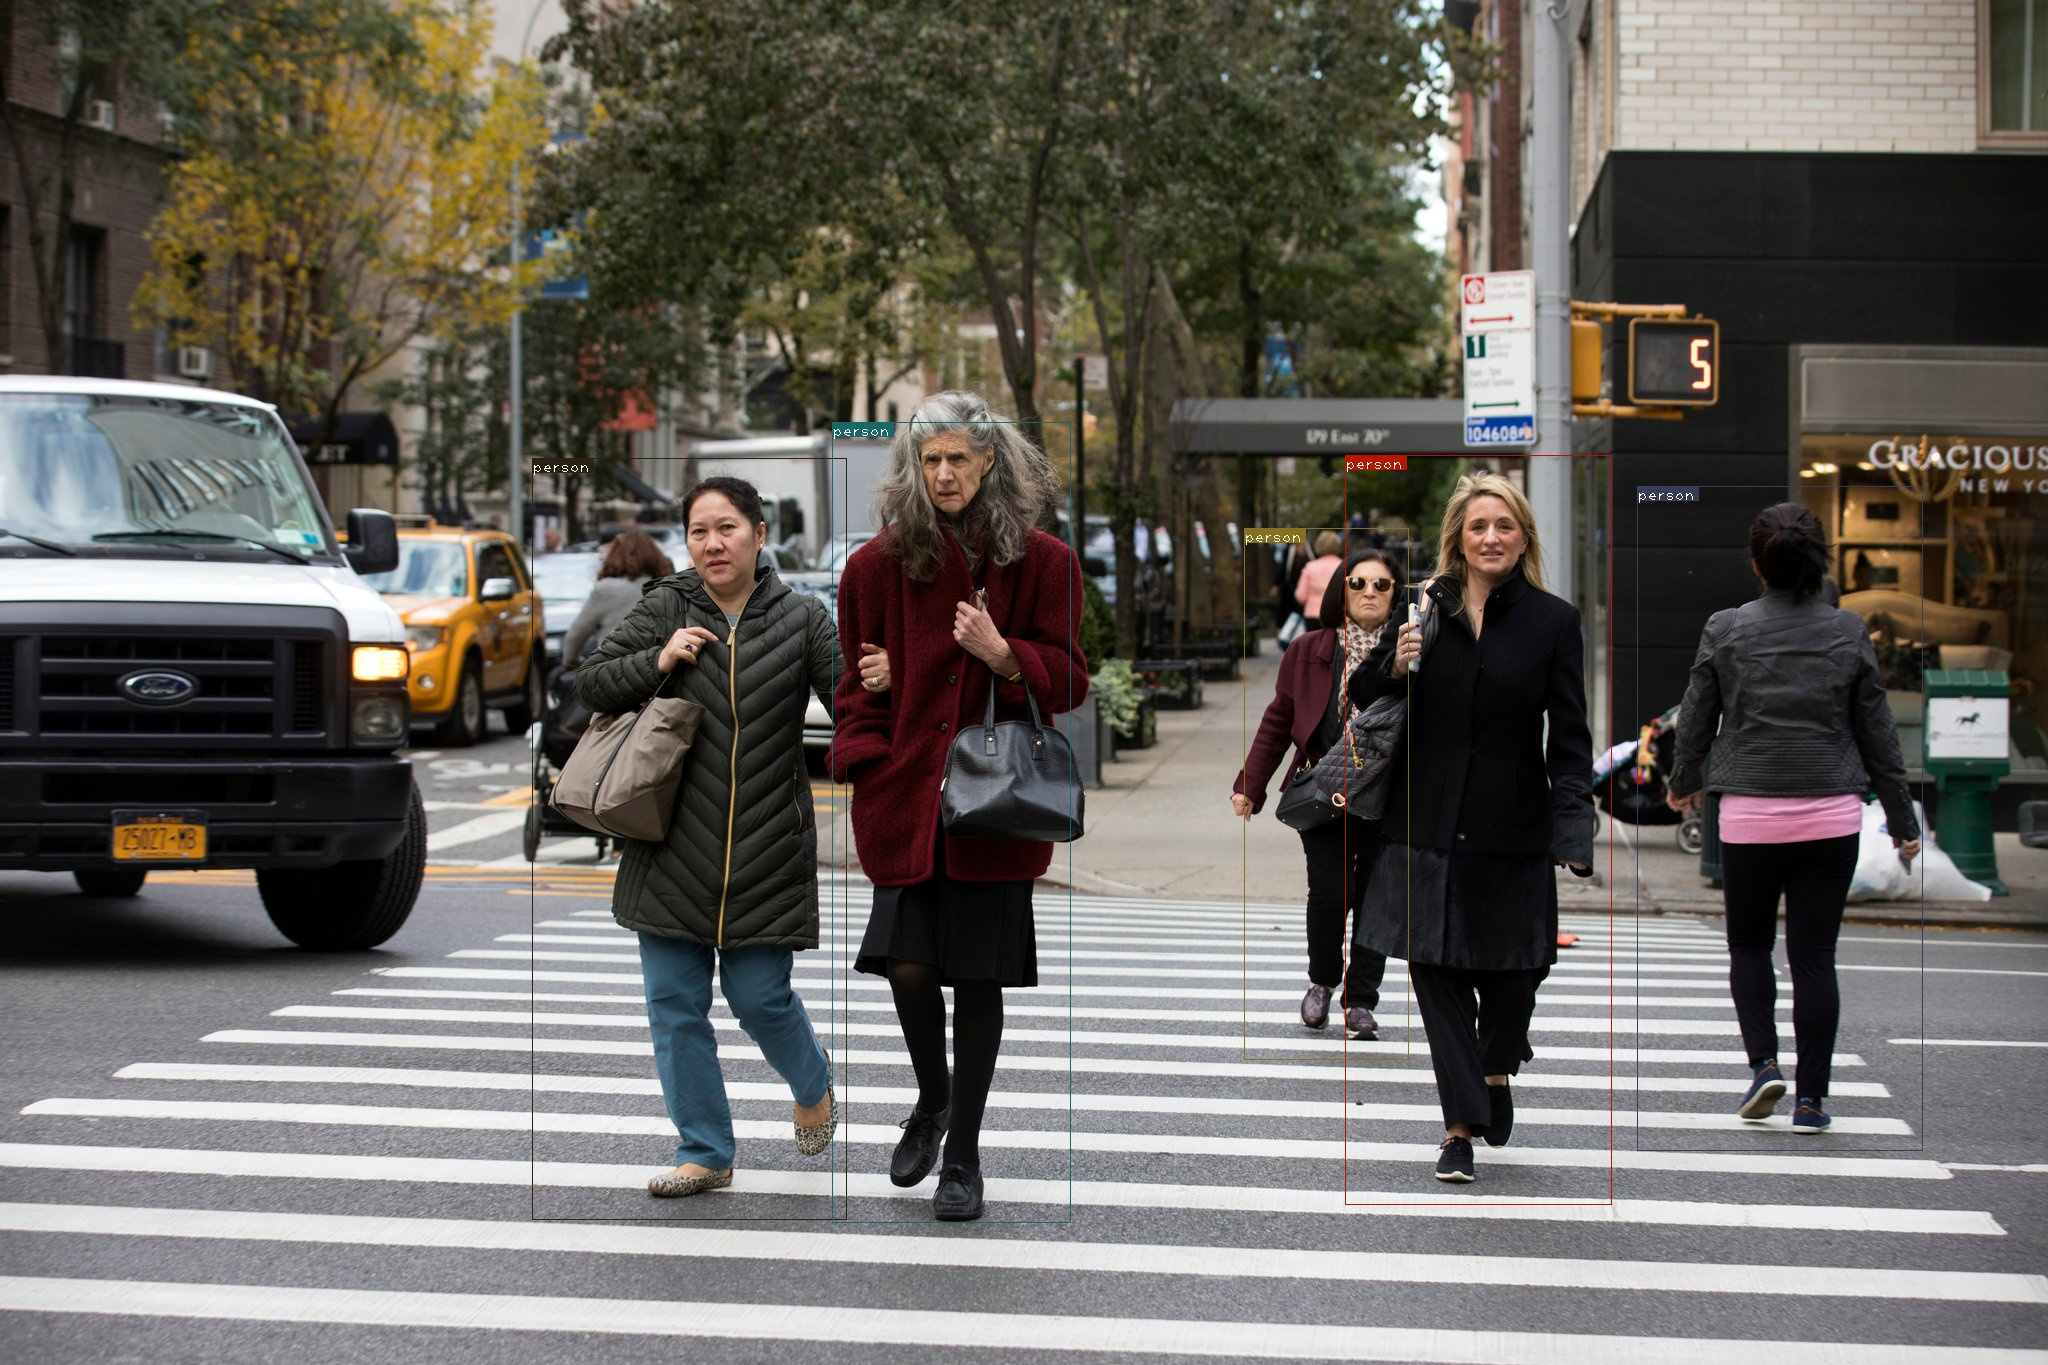

In [1]:
from IPython.display import Image
Image('predictions.jpg')

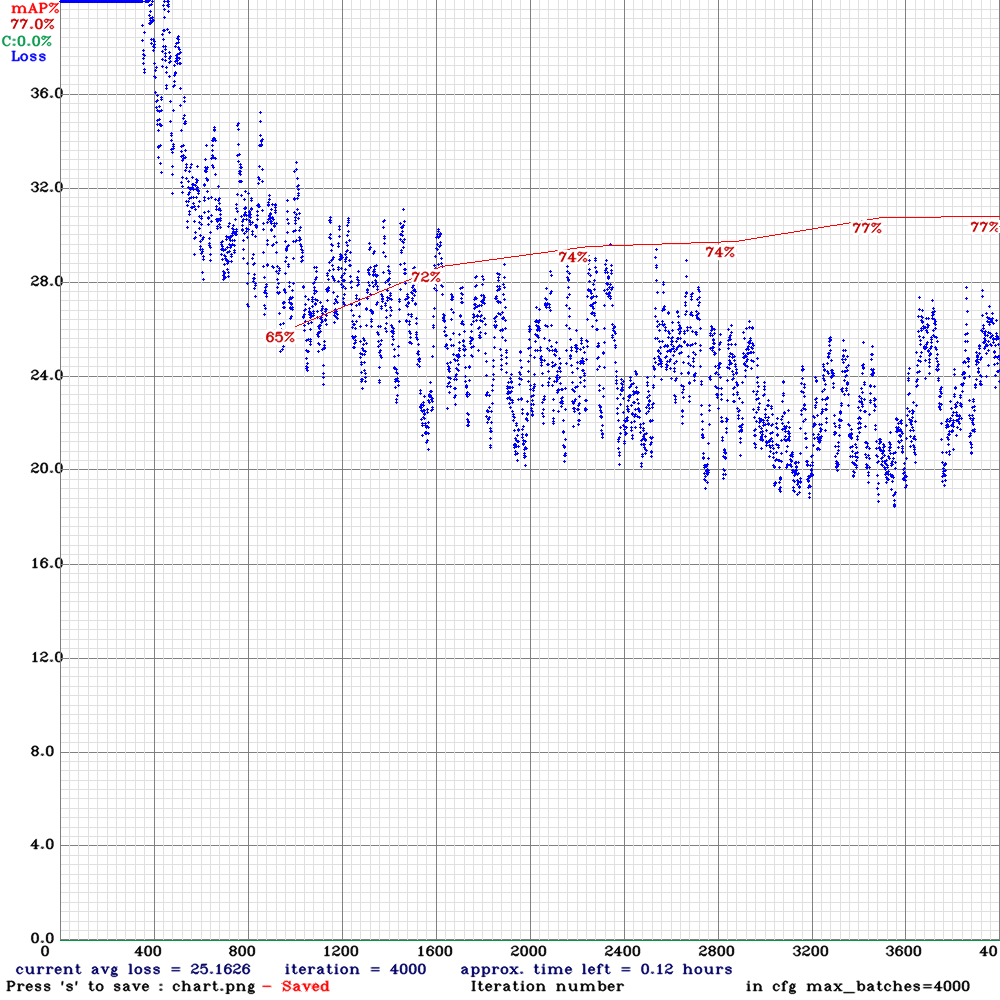

In [ ]:
Image('chart.png')